<a href="https://colab.research.google.com/github/Akhilchegonda/Akhil_INFO5731_Fall2023/blob/main/Akhil_Chegonda_In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import re
import string



In [ ]:
# Load train data
data_train = pd.read_csv(r'stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])

data_train[['Sentiment','Text']] = data_train["Text"].str.split(" ", n=1, expand=True)

print(data_train.head())

# Load test data
data_test = pd.read_csv(r'stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
data_test[['Sentiment','Text']] = data_test["Text"].str.split(" ", n=1, expand=True)
print(data_train.head())


<ipython-input-2-f36fbb96bbe0>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_train = pd.read_csv(r'stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
<ipython-input-2-f36fbb96bbe0>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_test = pd.read_csv(r'stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])


                                                Text Sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1
                                                Text Sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
w_l= WordNetLemmatizer()
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    Message = text.lower()
    Message = re.sub('\[.*?\]', '', Message)
    Message = re.sub('https?://\S+|www\.\S+', '', Message)
    Message = re.sub('<.*?>+', '', Message)
    Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
    Message = re.sub('\n', '', Message)
    Message = re.sub('\w*\d\w*', '', Message)
    return Message

# Create a new column called cleaned_Message in data_train
data_train['cleaned_text'] = data_train['Text'].apply(clean_text)
print(data_train.head(1))

# Create a new column called cleaned_Message in data_test
data_test['cleaned_text'] = data_test['Text'].apply(clean_text)
print(data_train.head(1))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Text Sentiment  \
0  a stirring , funny and finally transporting re...         1   

                                        cleaned_text  
0  a stirring  funny and finally transporting rei...  
                                                Text Sentiment  \
0  a stirring , funny and finally transporting re...         1   

                                        cleaned_text  
0  a stirring  funny and finally transporting rei...  


In [ ]:
# Split the data into training and validation sets
from sklearn.feature_extraction.text import TfidfVectorizer

train_data, val_data, train_labels, val_labels = train_test_split(data_train['Text'], data_train['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(preprocessor=clean_text)
train_vectors = vectorizer.fit_transform(train_data)
val_vectors = vectorizer.transform(val_data)

# Split the data into test and validation sets
test_data, val_data, test_labels, val_labels = train_test_split(data_test['Text'], data_test['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(preprocessor=clean_text)
test_vectors = vectorizer.fit_transform(test_data)
val_vectors = vectorizer.transform(val_data)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier
!pip install --upgrade scikit-learn
!pip install --upgrade pandas

In [ ]:
cvect = CountVectorizer()
X=cvect.fit_transform(data_train['Text'])

tf_vect=TfidfVectorizer(use_idf=True)
X_idf=tf_vect.fit_transform(data_train['Text'])

print(X_idf.shape)
X_idf_df=pd.DataFrame(X_idf.toarray(), columns=tf_vect.get_feature_names_out())

X_train_idf = tf_vect.transform(data_train['Text'])
print(X_idf.shape)

X_test_idf = tf_vect.transform(data_test['Text'])
print(X_idf.shape)

(6920, 13789)
(6920, 13789)
(6920, 13789)


In [ ]:
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()
x_train, x_test, y_train, y_test = train_test_split(X_idf_df, data_train['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [ ]:
#1) MultinominalNB
# Import necessary modules
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier on the training data
mnb.fit(x_train, y_train)

# Use the trained classifier to predict the labels of the test data
y_pred = mnb.predict(x_test)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Perform 10-fold cross-validation on the test data
scores = cross_val_score(mnb, x_test, y_test, cv=10)

# Compute and print the mean accuracy score
mean_accuracy = scores.mean()
print(f"Mean accuracy multinomial: {mean_accuracy}")

Accuracy: 0.7969653179190751
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       671
           1       0.76      0.89      0.82       713

    accuracy                           0.80      1384
   macro avg       0.81      0.79      0.79      1384
weighted avg       0.81      0.80      0.79      1384

Mean accuracy multinomial: 0.7434365551037432


In [ ]:
#2 SVM
SVM_test = SVM.fit(x_train,y_train)
Y_SVM = SVM_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_SVM,y_test))
print(classification_report(y_test,Y_SVM))
from sklearn.model_selection import cross_val_score
sco_SVM = cross_val_score(SVM, x_test, y_test, cv=10)
print("Accuracy for SVM",sco_SVM.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy 0.809971098265896
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       671
           1       0.79      0.85      0.82       713

    accuracy                           0.81      1384
   macro avg       0.81      0.81      0.81      1384
weighted avg       0.81      0.81      0.81      1384



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: Futu

Accuracy for SVM 0.740610989469294


In [ ]:
#3 KNN
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Train the classifier on the training data
knn.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(x_test)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Perform 10-fold cross-validation on the test data
scores = cross_val_score(knn, x_test, y_test, cv=10)

# Compute and print the mean accuracy score
mean_accuracy = scores.mean()
print(f"Mean accuracy KNN: {mean_accuracy}")

Accuracy: 0.7283236994219653
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       671
           1       0.71      0.79      0.75       713

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.73      1384
weighted avg       0.73      0.73      0.73      1384

Mean accuracy KNN: 0.6964706495673028


In [ ]:
# 4 Decision tree
# Train Decision Tree classifier
dec_tree_test = DT.fit(x_train, y_train)

# Predict using Decision Tree classifier
Y_dec_tree = dec_tree_test.predict(x_test)

# Print accuracy score and classification report
acc_dec_tree = accuracy_score(Y_dec_tree, y_test)
print(f"Accuracy: {acc_dec_tree}")
print(classification_report(y_test, Y_dec_tree))

# Cross-validation
scores_DT = cross_val_score(DT, x_test, y_test, cv=10)
print("Cross-validation accuracy score for Decision Trees: ", scores_DT.mean())


Accuracy: 0.6184971098265896
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       671
           1       0.62      0.65      0.64       713

    accuracy                           0.62      1384
   macro avg       0.62      0.62      0.62      1384
weighted avg       0.62      0.62      0.62      1384

Cross-validation accuracy score for Decision Trees:  0.591101032217704


In [ ]:
#(5) Random Forest
# Fit and evaluate the Random Forest model
RF.fit(x_train, y_train)
Y_RF = RF.predict(x_test)
accuracy_RF = accuracy_score(Y_RF, y_test)
print('Accuracy of Random Forest: {:.2f}%'.format(accuracy_RF*100))
print(classification_report(y_test, Y_RF))

# Cross-validate the Random Forest model
scores_RF = cross_val_score(RF, x_test, y_test, cv=10)
print("Cross-validation Accuracy of Random Forest: {:.2f}%".format(scores_RF.mean()*100))


Accuracy of Random Forest: 72.25%
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       671
           1       0.70      0.81      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.72      1384
weighted avg       0.73      0.72      0.72      1384

Cross-validation Accuracy of Random Forest: 67.48%


In [ ]:
#(6) XGBoost
y_train = y_train.astype(int)
y_test = y_test.astype(int)

XGB_test = XGB.fit(x_train,y_train)
Y_XGB = XGB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_XGB,y_test))
print(classification_report(y_test,Y_XGB))
sco_XGB = cross_val_score(XGB, x_test, y_test, cv=10)
print("Accuracy using XGBoost",sco_XGB.mean())


Accuracy 0.7232658959537572
              precision    recall  f1-score   support

           0       0.76      0.62      0.69       671
           1       0.70      0.82      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.72      1384
weighted avg       0.73      0.72      0.72      1384

Accuracy using XGBoost 0.6690386820978


In [ ]:
#7 Word2Vec
import numpy as np
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define the Word2Vec model
model_w2v = Word2Vec(sentences=[sentence.split() for sentence in data_train], vector_size=100, window=5, min_count=1, workers=4)

# Create vectors for the training and test data using the Word2Vec model
train_vectors = np.array([np.mean([model_w2v.wv[token] for token in sentence.split()], axis=0) for sentence in data_train])
test_vectors = np.array([np.mean([model_w2v.wv[token] for token in sentence.split()], axis=0) for sentence in data_test])

## Train a logistic regression model on the training vectors
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_idf, data_train['Sentiment'])

# Make predictions on the test vectors
predictions = model_lr.predict(X_test_idf)

# Calculate evaluation metrics
accuracy = accuracy_score(data_test['Sentiment'], predictions)
recall = recall_score(data_test['Sentiment'], predictions, average='weighted')
precision = precision_score(data_test['Sentiment'], predictions, average='weighted')
f1 = f1_score(data_test['Sentiment'], predictions, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.7902251510159253
Recall: 0.7902251510159253
Precision: 0.7914294936433314
F1 Score: 0.79002316534237


In [ ]:
#8 BERT
!pip install simpletransformers
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from collections import Counter
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_labels = le.fit_transform(data_test['Sentiment'])

cuda_available = torch.cuda.is_available()
train_args ={"reprocess_input_data": True,
             "fp16":False,
             "use_early_stopping" : 0,
             "num_train_epochs": 40}

model = ClassificationModel(
    "bert", 'bert-base-uncased',
    num_labels=2,
    args=train_args,
     use_cuda=cuda_available
)

data_test['Text'] = data_test['Text'].apply(clean_text)
data_test = pd.DataFrame(data_test, columns=['Text'])
data_test['Sentiment'] = test_labels


test_labels = np.array(data_test['Sentiment']).reshape(-1)

labels = np.array(data_test['Sentiment']).reshape(-1)

data_train['Text'] = data_train['Text'].apply(clean_text)
data_test= pd.DataFrame(data_test)
result, model_outputs, wrong_predictions = model.eval_model(data_test, acc=accuracy_score)
# Evaluate the model on the test data
result, model_outputs, wrong_predictions = model.eval_model(data_test, acc=accuracy_score)

# Extract predicted labels and probabilities from model outputs
predicted_labels = np.argmax(model_outputs, axis=1)
probabilities = model_outputs[:, 1]

# Compute evaluation metrics
f1 = f1_score(test_labels, predicted_labels)
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)

# Print the evaluation metrics
print("F1 Score: {:.4f}".format(f1))
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1821 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/228 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1821 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/228 [00:00<?, ?it/s]

F1 Score: 0.0211
Accuracy: 0.4893
Precision: 0.2439
Recall: 0.0110


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
#Write your code here.

import pandas as pd
data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', encoding='utf-8')
data.head()




,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


<Axes: ylabel='count'>

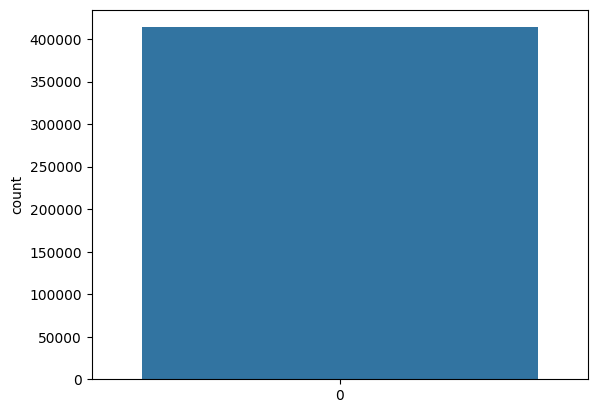

In [ ]:
!pip install matplotlib

import seaborn as sns
sns.countplot(data.Rating)

In [ ]:
def part(x1):
    if x1 < 3:
        return 'negative'
    return 'positive'
act_Sco = data['Rating']
posNeg = act_Sco.map(part)
data['RatingPosNeg'] = posNeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-matplotlib is already the newest version (3.5.1-2build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-matplotlib is already the newest version (3.5.1-2build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
RatingPosNeg
positive    316762
negative     97078
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


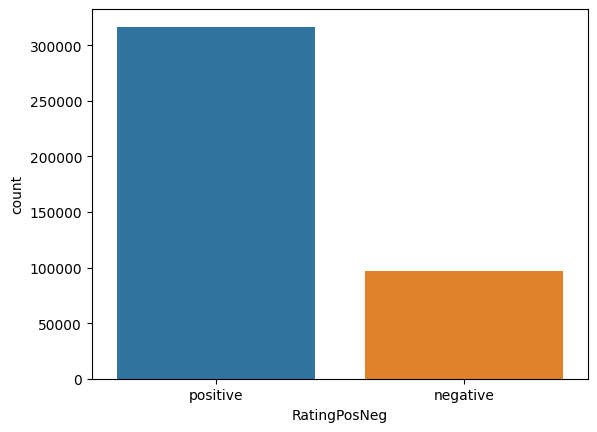

In [ ]:
!apt install python3-matplotlib
!pip install matplotlib
!apt install python3-matplotlib


print(data.RatingPosNeg.astype('category').value_counts())
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='RatingPosNeg')
plt.show()



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english')
st=set(stopwords.words('english'))

fi = data

def clpunc(se):
    clean_dt = re.sub(r'[?|!|\'|"|#]',r'',se)
    clean_dt = re.sub(r'[.|,|)|(|\|/]',r' ',clean_dt)
    return  clean_dt
final = data.sample(n=10000, random_state=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

i=0
st1=' '
fi_str=[]
all_pos_wrds=[]
all_neg_wrds=[]
s1=''
for se in final['Reviews'].values:
    fil_se=[]
    try:
      for w in se.split():
          for c in clpunc(w).split():
              if((c.isalpha()) & (len(c)>2)):
                  if(c.lower() not in st):
                      s=(sno.stem(c.lower())).encode('utf8')
                      fil_se.append(s)
                      if (final['RatingPosNeg'].values)[i] == 'positive':
                          all_pos_wrds.append(s)
                      if(final['RatingPosNeg'].values)[i] == 'negative':
                          all_neg_wrds.append(s)
                  else:
                      continue
              else:
                  continue
      str1 = b" ".join(fil_se)

      fi_str.append(str1)
      i+=1
    except AttributeError as e:
      fi_str.append('')
      i+=1

In [ ]:
final['CleanedText']=fi_str
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
ct_vect = CountVectorizer()
bo = ct_vect.fit_transform(final['CleanedText'].values)
print(bo.shape)

(10000, 8444)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object
count_vect = CountVectorizer()
data.dropna(inplace=True)


# Fit the CountVectorizer object to your data
count_vect.fit(data['Reviews'])

# Get the feature names
terms = count_vect.vocabulary_.keys()

# Print the feature names
print(list(terms))


['feel', 'so', 'lucky', 'to', 'have', 'found', 'this', 'used', 'phone', 'us', 'not', 'hard', 'at', 'all', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'one', 'my', 'son', 'liked', 'his', 'old', 'that', 'finally', 'fell', 'apart', 'after', 'years', 'didn', 'want', 'an', 'upgrade', 'thank', 'you', 'seller', 'we', 'really', 'appreciate', 'it', 'your', 'honesty', 're', 'said', 'recommend', 'very', 'highly', 'would', 'but', 'them', 'again', 'nice', 'up', 'grade', 'pantach', 'revue', 'clean', 'set', 'easy', 'never', 'had', 'android', 'they', 'are', 'fantastic', 'say', 'the', 'least', 'perfect', 'size', 'for', 'surfing', 'social', 'media', 'great', 'samsung', 'pleased', 'works', 'good', 'goes', 'slow', 'sometimes', 'its', 'love', 'replace', 'lost', 'only', 'thing', 'is', 'volume', 'button', 'does', 'work', 'can', 'still', 'go', 'into', 'settings', 'adjust', 'other', 'than', 'job', 'until', 'am', 'eligible', 'thaanks', 'already', 'with', 'problems', 'know', 'stated', 'was

In [27]:
!pip install scikit-learn==0.24.2 --no-build-isolation





  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Preparing metadata (pyproject.toml) ... canceledERROR: Operation cancelled by user


In [28]:
!sudo apt-get install build-essential

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [29]:
pip install scikit-learn


In [33]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters=10,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=99, copy_x=True, algorithm='auto')
mod.fit(bo)

KMeans(algorithm='auto', n_clusters=10, n_init=10, random_state=99)

In [34]:
lab = mod.labels_
cluster_center=mod.cluster_centers_

In [35]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bo, lab, metric='euclidean')
silhouette_score

0.039971476489166546

In [36]:
dfrme = final
dfrme['Bow Clus Label'] = mod.labels_
dfrme.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3


In [37]:
dfrme.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0    1213
1      67
2    3109
3    4938
4     181
5      12
6       4
7       2
8     472
9       2
Name: Reviews, dtype: int64

In [38]:
print("Top terms per cluster:")
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]
terms = list(count_vect.vocabulary_.keys())
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in ord_centroids[i1, :10]:
        print(' %s' % terms[i], end='')
        print()


Top terms per cluster:
Cluster 0: persists
 teams
 hassles
 unnecessy
 technical
 pins
 usabilityi
 ffreeze
 leds
 charm
Cluster 1: persists
 teams
 ffreeze
 usabilityi
 leds
 unnecessy
 blocking
 hassles
 add
 pins
Cluster 2: persists
 technical
 hassles
 pins
 happier
 teams
 unnecessy
 lyfte
 leds
 gift
Cluster 3: hassles
 pins
 technical
 mildly
 unsure
 happier
 teams
 leds
 amongst
 bedroom
Cluster 4: persists
 teams
 leds
 hassles
 ffreeze
 gift
 usabilityi
 unnecessy
 pins
 psxpro
Cluster 5: persists
 teams
 leds
 ffreeze
 usabilityi
 charm
 hassles
 country
 psxpro
 pins
Cluster 6: persists
 teams
 holds
 blocking
 unnecessy
 theirs
 add
 bedroom
 leds
 pins
Cluster 7: teams
 blocking
 needle
 usabilityi
 persists
 oem
 unnecessy
 technical
 marks
 click
Cluster 8: persists
 teams
 hassles
 ffreeze
 leds
 unnecessy
 technical
 usabilityi
 pins
 psxpro
Cluster 9: persists
 blocking
 teams
 match
 percect
 unnecessy
 applying
 lame
 alpha
 usabilityi


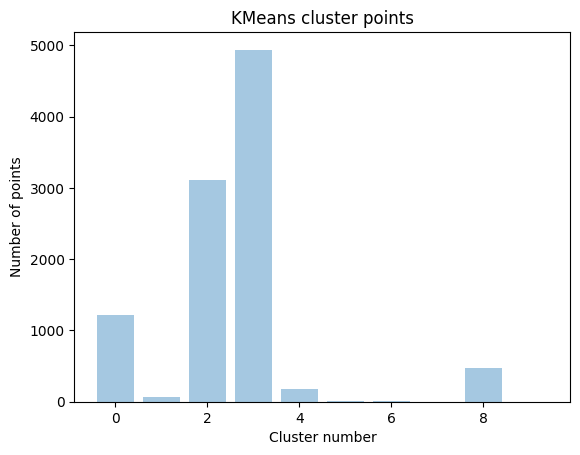

In [39]:
import matplotlib.pyplot as plt
plt.bar([x1 for x1 in range(10)], dfrme.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vect = TfidfVectorizer()
idf = idf_vect.fit_transform(final['CleanedText'].values)
idf.shape

(10000, 8444)

In [41]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters = 10,random_state=99)
mod.fit(idf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=99)

In [42]:
lab_tf = mod.labels_
cluster_center_tf=mod.cluster_centers_
cluster_center_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
ter = idf_vect.get_feature_names_out()
ter[1:10]

array(['aac', 'aand', 'ab', 'abandon', 'abc', 'abd', 'abeautifulit',
       'abierto', 'abil'], dtype=object)

In [44]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(idf, lab_tf, metric='euclidean')
silhouette_score_tf

0.06722384777483653

In [45]:
dfrme1 = dfrme
dfrme1['Tfidf Clus Label'] = mod.labels_
dfrme1.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3,9
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,negative,back camera stop work phone touch screen stop ...,0,0
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,positive,good,3,2
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,positive,complaint work fine still work perfect tear we...,2,6
134043,BLU Star 4.0 S410a Unlocked GSM Android 4.2 Sm...,BLU,171.43,1,hello my name is emildred towers do buy 2 phon...,0.0,negative,hello name emildr tower buy phone provid one g...,2,6
296313,"POSH MOBILE LYNX GSM UNLOCKED DUAL SIM 1.8"" GS...",Posh Mobile,17.1,1,Disappointed! Bought this phone for my mom and...,0.0,negative,disappoint bought phone mom one hard hear phon...,2,0
372121,Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM ...,Samsung,616.99,5,Perfect,0.0,positive,perfect,3,5
367604,Samsung Galaxy S6 G920I Factory Unlocked Cellp...,Samsung,319.99,5,10 puntos excelente!,0.0,positive,punto excelent,3,3
251605,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,4,good,0.0,positive,good,3,2


In [46]:
dfrme1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0    3661
1     431
2     395
3     172
4     295
5     268
6    4071
7     166
8     360
9     181
Name: Reviews, dtype: int64

In [47]:
print("Top terms per cluster:")
order_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in order_centroids[i1, :10]:
        print(' %s' % ter[i], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 use
 work
 great
 good
 one
 like
 batteri
 get
 screen
Cluster 1: great
 phone
 work
 price
 product
 condit
 buy
 deal
 good
 far
Cluster 2: good
 phone
 product
 price
 condit
 far
 work
 qualiti
 realli
 cell
Cluster 3: excelent
 producto
 telefono
 celular
 recomendado
 telfono
 súper
 punto
 recomienda
 tlf
Cluster 4: love
 phone
 great
 new
 good
 daughter
 son
 iphon
 absolut
 gift
Cluster 5: perfect
 work
 condit
 phone
 product
 love
 great
 everyth
 excel
 came
Cluster 6: work
 good
 like
 product
 expect
 use
 great
 phone
 well
 iphon
Cluster 7: nice
 phone
 good
 work
 product
 love
 fast
 look
 price
 recommend
Cluster 8: excel
 product
 phone
 recommend
 love
 good
 seller
 price
 purchas
 servic
Cluster 9: thank
 good
 excel
 great
 much
 product
 love
 phone
 work
 everyth


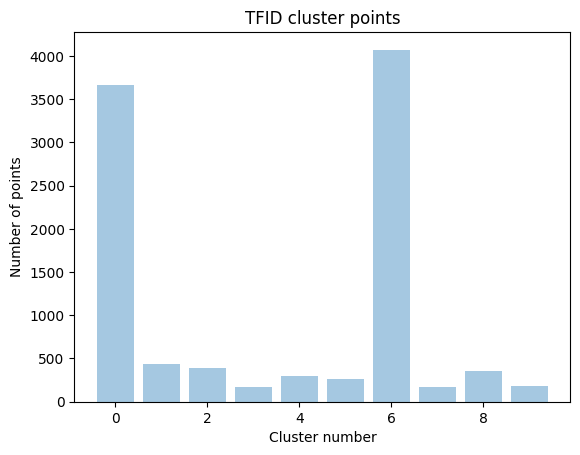

In [48]:
plt.bar([x1 for x1 in range(10)], dfrme1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [49]:
i1=0
lst_of_sent=[]
for se in final['CleanedText'].values:
    lst_of_sent.append(se.split())

In [50]:
i1=0
lst_sent_tr=[]
for s in final['CleanedText'].values:
    filter_sen=[]
    for w in se.split():
        for cle in clpunc(w).split():
            if(cle.isalpha()):
                filter_sen.append(cle.lower())
            else:
                continue
    lst_sent_tr.append(filter_sen)
print(lst_sent_tr)

[['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'pa

In [52]:
import gensim
w2v_mod=gensim.models.Word2Vec(lst_sent_tr, vector_size=100, workers=4)


In [53]:
import numpy as np
se_vecs = [];
for se in lst_sent_tr:
    se_vec = np.zeros(100)
    cnt_words =0;
    for word in se:
        try:
            vec = w2v_mod.wv[word]
            se_vec += vec
            cnt_words += 1
        except:
            pass
    se_vec /= cnt_words
    se_vecs.append(se_vec)
se_vecs = np.array(se_vecs)
se_vecs = np.nan_to_num(se_vecs)
se_vecs.shape

(10000, 100)

In [54]:
n_clu = [x1 for x1 in range(3,11)]
n_clu

[3, 4, 5, 6, 7, 8, 9, 10]

In [55]:
squared_errors = []
for cluster in n_clu:
    kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
    squared_errors.append(kmeans.inertia_)
optimal_clusters = np.argmin(squared_errors) + 2
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *

The optimal number of clusters obtained is -  2
The loss for optimal cluster is -  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [56]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(se_vecs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=2)

In [57]:
word_cluster_pred=model2.predict(se_vecs)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-1.77636183e-01,  1.34327104e-01,  4.80759636e-02,
         1.27566761e-01,  5.57850194e-02, -1.20034293e-02,
         1.96096427e-01,  1.46097196e-01, -2.22324015e-01,
        -8.64486400e-02,  6.11978711e-02, -6.82061453e-02,
         1.23300403e-02,  2.83141080e-02,  8.23384716e-02,
        -7.40571821e-02,  1.41612205e-01,  1.14933166e-01,
        -2.43895766e-01, -2.18462078e-01,  9.22149047e-05,
        -1.22637323e-02,  3.50463764e-01, -4.33596236e-02,
         6.32832448e-04,  3.36983777e-02,  2.98855646e-02,
         6.80113335e-02, -1.73577057e-01,  7.55204959e-02,
         1.65060409e-01, -1.12947946e-01, -2.70249879e-02,
        -1.86881154e-01, -1.76776925e-02,  9.23906583e-02,
         9.23286291e-02,  2.67666512e-02, -1.90108261e-02,
        -5.65892541e-03,  1.12991633e-01, -7.11317131e-02,
        -1.51639518e-01,  1.78750109e-02,  1.54418615e-01,
         3.90807082e-02, -4.31876852e-02,  2.09107689e-02,
         2.90922371e-02, -3.52410069e-02,  2.01210311e-0

In [58]:
dafrme = dfrme1
dafrme['AVG-W2V Clus Label'] = model2.labels_
dafrme.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0,0,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3,9,0


In [59]:
from sklearn.cluster import DBSCAN
mi_Pts = 2 * 100
def low_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mi_tr = int(l + (r - l) / 2)
        if nums[mi_tr] >= target:
            r = mi_tr - 1
        else:
            l = mi_tr + 1
    return l
def compute200thnearestneighbour(x, data):
    dists1 = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists1) == 200 and dists1[199] > dist):
            l = int(low_bound(dists1, dist))
            if l < 200 and l >= 0 and dists1[l] > dist:
                dists1[l] = dist
        else:
            dists1.append(dist)
            dists1.sort()

    return dists1[199]

In [60]:
two_hund_neigh = []
for v1 in se_vecs[:1500]:
    two_hund_neigh.append( compute200thnearestneighbour(v1, se_vecs[:1500]) )
two_hund_neigh.sort()

In [61]:
mod_DB = DBSCAN(eps = 5, min_samples = mi_Pts, n_jobs=-1)
mod_DB.fit(se_vecs)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [62]:
dfrme_db = dafrme
dfrme_db['AVG-W2V Clus Label'] = mod_DB.labels_
dfrme_db.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0,0,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3,9,0


<Axes: ylabel='count'>

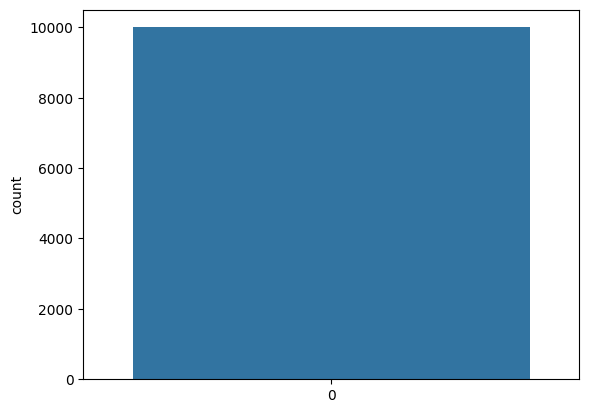

In [63]:
import seaborn as sns
dfrme_db = dfrme_db.reset_index(drop=True)
sns.countplot(dfrme_db['Tfidf Clus Label'])


In [64]:
dafrme.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    10000
Name: Reviews, dtype: int64

In [65]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve
Agg=cluster.fit_predict(se_vecs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [66]:
agg_dafrme_a = dfrme_db
agg_dafrme_a['AVG-W2V Clus Label'] = cluster.labels_
agg_dafrme_a.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
0,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0,0,0
1,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3,9,0


In [67]:
agg_dafrme_a.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    9996
1       1
2       1
3       1
4       1
Name: Reviews, dtype: int64

In [68]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from transformers import BertTokenizer, BertModel
import torch


In [69]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df.dropna(inplace=True)
df = df.sample(frac=0.01, random_state=1)  # subsample for faster computation
df['text'] = df['Reviews'].apply(lambda x: x.lower().split())  # tokenize and convert to lowercase

In [70]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(df['text'], vector_size=100, min_count=5, workers=4)


In [72]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# define function to clean text
def clean_text(text):
    # remove non-letters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # tokenize text
    words = word_tokenize(text)
    # remove stop words
    words = [word for word in words if word not in stopwords.words('english')]
    # join words back into text
    text = ' '.join(words)
    return text

# check for non-string values in 'Reviews' column
non_string_values = data['Reviews'].apply(lambda x: type(x)).value_counts()
print(non_string_values)

# remove non-string values
data = data[data['Reviews'].apply(lambda x: isinstance(x, str))]

# clean text and tokenize
data['clean_text'] = data['Reviews'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Reviews
<class 'str'>    334328
Name: count, dtype: int64


In [73]:
from gensim.models import Word2Vec
word2vec = Word2Vec( vector_size = 100, negative=5, hs=1, min_count=2, sample = 0)
word2vec.build_vocab([i for i in df['text']])
words = set(word2vec.wv.index_to_key )
import numpy as np
k = list()
for ls in df['text']:
  p = list()
  for i in ls:
    if i in words:
      p.append(word2vec.wv[i])
  k.append(np.array(p))
final = list()
for i in k:
  final.append(np.array(i))
final_a = list()
for i in final:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_a.append(z)
p = pd.DataFrame(final_a)
p = p.fillna(0)
p

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.002002,0.000710,-0.000482,0.000549,0.000348,-0.001408,0.000171,0.003356,-0.000878,-0.001621,...,0.000370,0.001573,0.002480,-0.000263,0.000082,0.004156,0.000348,-0.000521,0.001515,0.001315
1,0.000347,0.000688,0.000723,-0.000015,-0.001712,-0.001438,0.002280,0.002254,-0.000392,0.000174,...,0.002762,0.002432,-0.001813,0.000606,-0.001461,0.001394,0.000445,-0.000926,0.001751,0.002497
2,-0.002758,0.001294,-0.003524,0.000178,0.004269,-0.003765,0.003445,-0.001766,-0.001938,-0.008108,...,0.000075,-0.004293,-0.008210,-0.000741,0.001288,-0.003011,-0.004190,-0.003811,0.000740,0.008587
3,-0.001578,0.000720,0.000407,0.000862,0.001212,-0.000573,0.001208,0.002060,-0.002293,-0.001173,...,0.001064,0.001106,0.000691,-0.000597,0.001914,0.001105,0.000043,-0.000515,0.000396,0.000688
4,0.009382,-0.004807,0.009593,0.008796,0.007044,-0.000415,-0.005224,-0.007682,0.005986,0.007158,...,0.000492,-0.002273,-0.001341,0.009918,0.004339,0.009572,0.005532,-0.008319,-0.002604,-0.007497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,-0.001909,-0.000666,0.001885,0.002331,0.002200,-0.001042,0.001464,0.002164,0.000891,-0.001597,...,0.002547,-0.000517,0.000157,0.000657,0.001980,0.002470,-0.000720,-0.002909,0.000049,0.001506
3339,0.002805,0.000921,-0.001471,-0.000962,-0.002480,-0.006549,-0.001055,-0.004348,0.000844,-0.000636,...,0.001164,0.004161,-0.005805,0.003086,0.001751,0.003906,-0.000387,-0.006197,-0.002739,0.005013
3340,0.002311,-0.000171,0.003940,0.000260,-0.001045,-0.003536,-0.000166,0.001674,-0.003595,-0.001817,...,0.000179,0.000272,0.001906,-0.000445,0.001057,0.000237,0.001206,-0.002171,0.001456,0.000468
3341,0.002122,0.001629,-0.000637,-0.004232,0.002527,0.000966,0.001001,0.001614,-0.001428,-0.002195,...,-0.003892,-0.001241,0.004305,-0.000624,-0.001811,-0.004767,-0.000826,-0.001806,0.003505,-0.003156


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

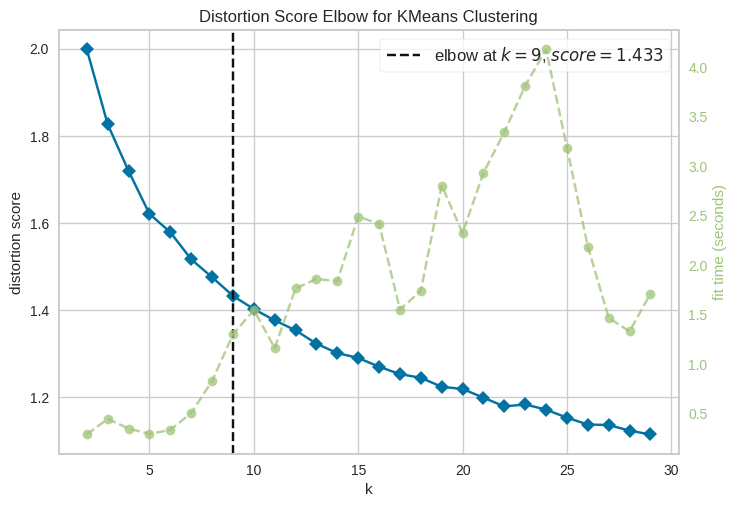

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(p)
visualizer.show()

In [75]:
k=KMeans(init='k-means++',n_clusters=11,n_init=100,random_state=0).fit(p)
labels =k.predict(p)
cd = df.assign(Cluster=labels)

In [76]:
for i in range(10):
  print(cd[cd['Cluster'] == i])
  print('*' * 10)

                                             Product Name Brand Name   Price  \
391464  Sony Xperia X Performance unlocked smartphone,...       Sony  549.99   
24541               Apple iPhone 5c 16GB (Green) - Sprint      Apple  605.00   
14349   Apple iPhone 4S 32GB Unlocked GSM Smartphone w...      Apple  208.00   
34969     Apple iPhone 5c 8GB (Yellow) - Verizon Wireless      Apple  179.99   
163454  BLU WIN HD LTE - 5.0" Windows Smartphone -GSM ...        BLU  109.99   
...                                                   ...        ...     ...   
278418  OnePlus 2 Unlocked Smartphone, 64GB Sandstone ...    OnePlus  274.86   
141305           BLU Studio 5.0k - Unlocked (Neon Yellow)        BLU  119.50   
43679              Apple iPhone 5s 32GB (Gold) - T-Mobile      Apple  210.00   
279490  Original 4G Unlocked Lenovo A8 / A806 5.0 Inch...       XJKJ  109.99   
2492    ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...    Alcatel  129.00   

        Rating                         

In [77]:
k=KMeans(init='k-means++',n_clusters=11,n_init=100,random_state=0).fit(p)
labels =k.predict(p)
cd = df.assign(Cluster=labels)

In [78]:
for i in range(10):
  print(cd[cd['Cluster'] == i])
  print('*' * 10)

                                             Product Name Brand Name   Price  \
391464  Sony Xperia X Performance unlocked smartphone,...       Sony  549.99   
24541               Apple iPhone 5c 16GB (Green) - Sprint      Apple  605.00   
14349   Apple iPhone 4S 32GB Unlocked GSM Smartphone w...      Apple  208.00   
34969     Apple iPhone 5c 8GB (Yellow) - Verizon Wireless      Apple  179.99   
163454  BLU WIN HD LTE - 5.0" Windows Smartphone -GSM ...        BLU  109.99   
...                                                   ...        ...     ...   
278418  OnePlus 2 Unlocked Smartphone, 64GB Sandstone ...    OnePlus  274.86   
141305           BLU Studio 5.0k - Unlocked (Neon Yellow)        BLU  119.50   
43679              Apple iPhone 5s 32GB (Gold) - T-Mobile      Apple  210.00   
279490  Original 4G Unlocked Lenovo A8 / A806 5.0 Inch...       XJKJ  109.99   
2492    ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...    Alcatel  129.00   

        Rating                         

In [79]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=386630c0fb3075d232dd19f5a39b90bed941b22bec70395df12ad94df07ea7d6
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [80]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

.gitattributes:   0%|          | 0.00/345 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [84]:
final_1 = list()
for i in final_1:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)

In [85]:
k  = pd.DataFrame(final_a)
k = k.fillna(0)
k

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.002002,0.000710,-0.000482,0.000549,0.000348,-0.001408,0.000171,0.003356,-0.000878,-0.001621,...,0.000370,0.001573,0.002480,-0.000263,0.000082,0.004156,0.000348,-0.000521,0.001515,0.001315
1,0.000347,0.000688,0.000723,-0.000015,-0.001712,-0.001438,0.002280,0.002254,-0.000392,0.000174,...,0.002762,0.002432,-0.001813,0.000606,-0.001461,0.001394,0.000445,-0.000926,0.001751,0.002497
2,-0.002758,0.001294,-0.003524,0.000178,0.004269,-0.003765,0.003445,-0.001766,-0.001938,-0.008108,...,0.000075,-0.004293,-0.008210,-0.000741,0.001288,-0.003011,-0.004190,-0.003811,0.000740,0.008587
3,-0.001578,0.000720,0.000407,0.000862,0.001212,-0.000573,0.001208,0.002060,-0.002293,-0.001173,...,0.001064,0.001106,0.000691,-0.000597,0.001914,0.001105,0.000043,-0.000515,0.000396,0.000688
4,0.009382,-0.004807,0.009593,0.008796,0.007044,-0.000415,-0.005224,-0.007682,0.005986,0.007158,...,0.000492,-0.002273,-0.001341,0.009918,0.004339,0.009572,0.005532,-0.008319,-0.002604,-0.007497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,-0.001909,-0.000666,0.001885,0.002331,0.002200,-0.001042,0.001464,0.002164,0.000891,-0.001597,...,0.002547,-0.000517,0.000157,0.000657,0.001980,0.002470,-0.000720,-0.002909,0.000049,0.001506
3339,0.002805,0.000921,-0.001471,-0.000962,-0.002480,-0.006549,-0.001055,-0.004348,0.000844,-0.000636,...,0.001164,0.004161,-0.005805,0.003086,0.001751,0.003906,-0.000387,-0.006197,-0.002739,0.005013
3340,0.002311,-0.000171,0.003940,0.000260,-0.001045,-0.003536,-0.000166,0.001674,-0.003595,-0.001817,...,0.000179,0.000272,0.001906,-0.000445,0.001057,0.000237,0.001206,-0.002171,0.001456,0.000468
3341,0.002122,0.001629,-0.000637,-0.004232,0.002527,0.000966,0.001001,0.001614,-0.001428,-0.002195,...,-0.003892,-0.001241,0.004305,-0.000624,-0.001811,-0.004767,-0.000826,-0.001806,0.003505,-0.003156


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

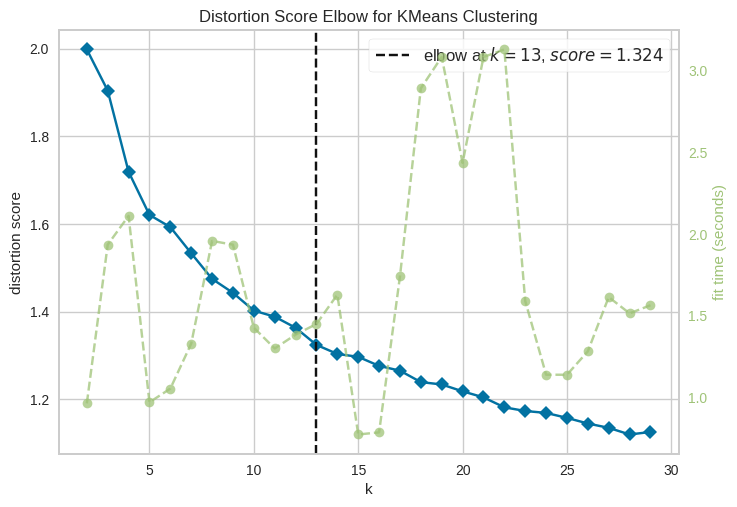

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(k)
visualizer.show()

In [87]:
d=KMeans(init='k-means++',n_clusters=10,n_init=100,random_state=0).fit(k)
labels =d.predict(k)
cd = df.assign(Cluster=labels)

In [88]:
for i in range(10):
  print(cd[cd['Cluster'] == i])
  print('*' * 10)

                                             Product Name   Brand Name  \
300269  POSH Revel S500a - 5.0", 4G, Android 4.4 Kit K...  Posh Mobile   
192770  HTC One M7 32GB Sprint CDMA No-Contract 4G LTE...          HTC   
296535  Posh Mobile Memo S580a - 5.8" Display, 4G H+ G...  Posh Mobile   
292651  Polaroid A4PK 4" Unlocked Smartphone Bundle Ac...     Polaroid   
354084  Samsung Galaxy S5 Mini G800H Unlocked Cellphon...      Samsung   
...                                                   ...          ...   
107668  BLU Dash 5.5 - Unlocked Cell Phones - Retail P...          BLU   
369014  Samsung Galaxy S6 SM-G920i Factory Unlocked Ce...      samsung   
116256  BLU Dash X Plus - Unlocked 5.5" Smartphone - G...          BLU   
65822   Apple iPhone 6s 16 GB US Domestic Warranty Unl...        Apple   
27673            Apple iPhone 5c 32GB - Unlocked - (Blue)        Apple   

         Price  Rating                 Reviews  Review Votes  \
300269   78.39       5              Love it!!! 

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

Kmeans: The Kmeans clustering method first groups the data based on similarity, and then the data points of k numbers are randomly assigned, showing the centroids of each group. The remaining data points that are left out are then mapped to the next closest centroid, and
this process is repeated inside each of these groups until the data in the centroids changes and each of the data points are stored in the same group.

DBSCAN: DBSCAN (Density-based spatial clustering of applications with noise) is a density-based clustering
algorithm where data points are grouped according to how similar they are to one another and areas with higher data densities are stored
as a single group while areas with lower densities are stored as noise to help separate the data that are identical in nature.


Hierarchical clustering: The hierarchical method is achieved by repeatedly grouping each document or data point with those that are the
most similar. Each of these data point combinations results in a node that is in the form of a hierarchical tree, and the resulting nodes are
then combined with those that are the most similar.

Word2Vec: By anticipating the context in which words will appear in a given text corpus, Word2Vec is a predictive model that learns word embeddings.
Word2Vec embeddings can be learnt on smaller text corpora and are often lower dimensional.

BERT: BERT is a transformer-based language model that gains contextualized embeddings by training on a sizable amount of unlabeled text data.
BERT embeddings are often higher-dimensional and need a lot of data to train efficiently.
